<a href="https://colab.research.google.com/github/gkrdls/data-analysis-programming/blob/main/202013125_%EC%9D%B4%ED%95%99%EC%9D%B8_DataAnalysisProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

이 프로젝트에서는 고객들의 데이터를 기반으로 한 클러스터링을 진행한다.


비즈니스에서 고객을 세분화 시키는 것은 전략적 의사결정을 하는데 있어서 필수적이다.


해당 데이터셋은 실제 'FMCG' 매장에 들어갈 때 해당 지역에서 2,000명이 구매한 행동에 대한 정보로 구성된다.

모든 데이터는 체크아웃할 때 사용하는 로열티 카드를 통해 수집되었다.

데이터는 전처리가 되었고 누락된 값이 없다.

또한 고객의 프라이버시 보호를 위해 데이터셋의 볼륨을 제한하고 익명화하였다.

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_customer = pd.read_csv("/content/segmentation data.csv") #데이터셋 가져오기
df_customer.head()  #앞 부분만 일부 출력

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1



ID
*   data type: numerical
*   range: Integer
*   description: 고객의 ID를 나타낸다.

Sex
*   data type: categorical
*   range: {0, 1}
*   description: 고객의 성별을 나타낸다.

Marital status
*   data type: categorical
*   range: {0, 1}
*   description: 고객의 결혼 여부를 나타낸다.
*   0: single
*   1: non-single



Age
*   data type: numerical
*   range: Integer
*   description: 고객의 나이를 나타낸다.

Education
*   data type: categorical
*   range: {0, 1, 2, 3}
*   description: 고객의 교육 수준을 나타낸다.
*   0: other / unknown
*   1: highschool
*   2: university
*   3: graduate school

Income
*   data type: numerical
*   range: Real
*   description: 고객의 연 수입을 달러로 나타낸다.
*   min_value: 35832
*   max_value: 309364

Occupation
*   data type: categorical
*   range: {0, 1, 2}
*   description: 고객의 직종을 나타낸다.
*   0: unemployed / unskilled
*   1: skilled employee / official
*   2: management / self-employed / highly qualified employee / officer

Settlement size
*   data type: categorical
*   range: {0, 1, 2}
*   description: 고객이 거주중인 지역의 크기를 나타낸다.
*   0: small city
*   1: mid-sized city
*   2: big city










In [53]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [54]:
df_customer.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,5.774946e+02,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,1.000000e+08,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [55]:
numerical_columns = ["ID", "Age", "Income"]
categorical_columns = ['Sex','Marital status','Education','Occupation','Settlement size']

먼저 수치형 변수가 어떻게 분포되어있는지 살펴보겠다.


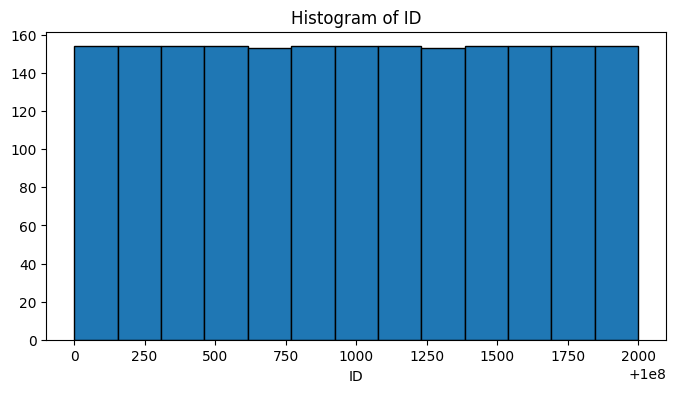

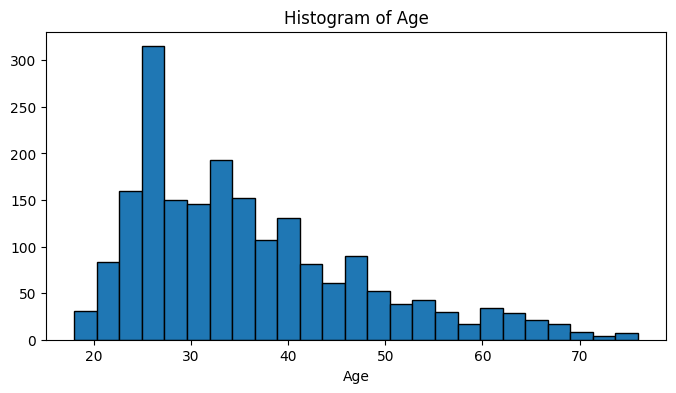

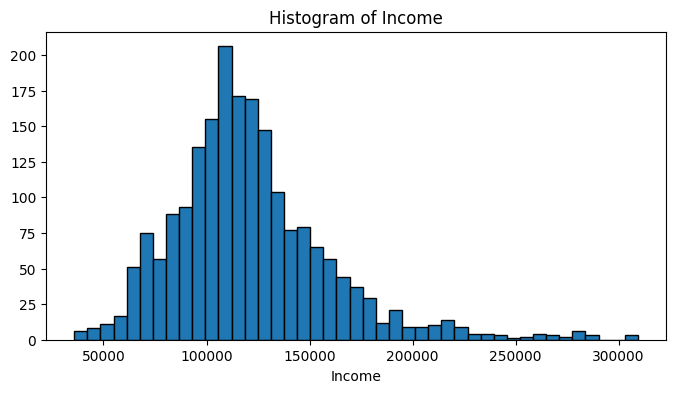

In [56]:
for numerical in numerical_columns:
    plt.figure(figsize=(8, 4))
    plt.hist(df_customer[numerical], bins='auto', edgecolor='black')
    plt.xlabel(numerical)
    plt.title(f'Histogram of {numerical}')
    plt.show()


이제 범주형 변수가 어떻게 분포되어있는지 살펴보겠다.


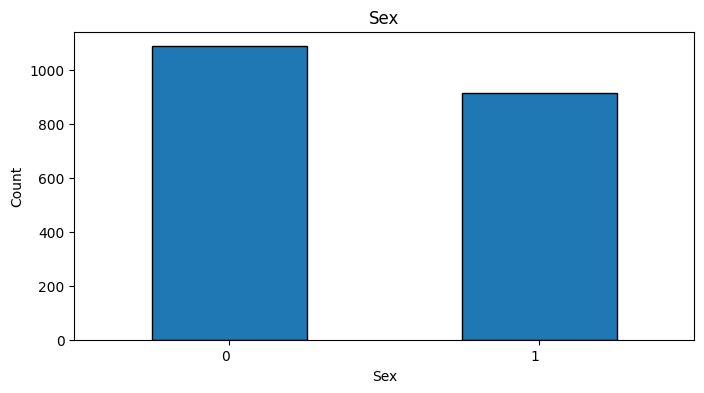

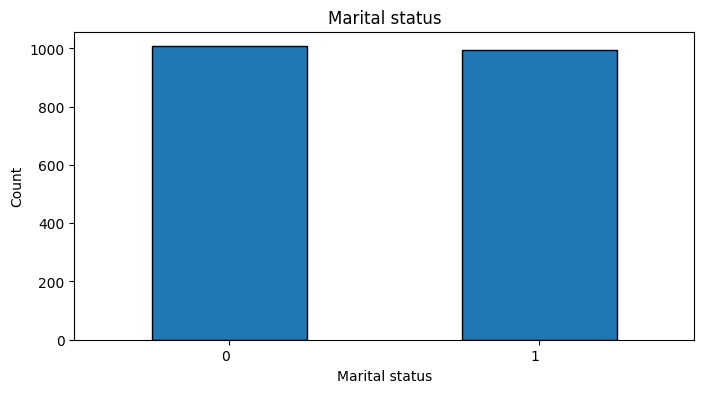

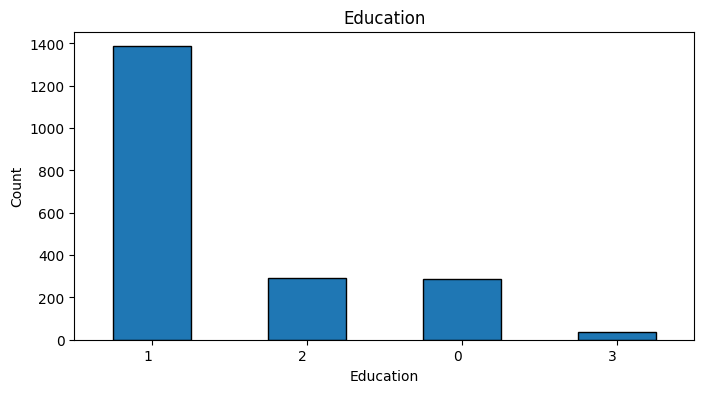

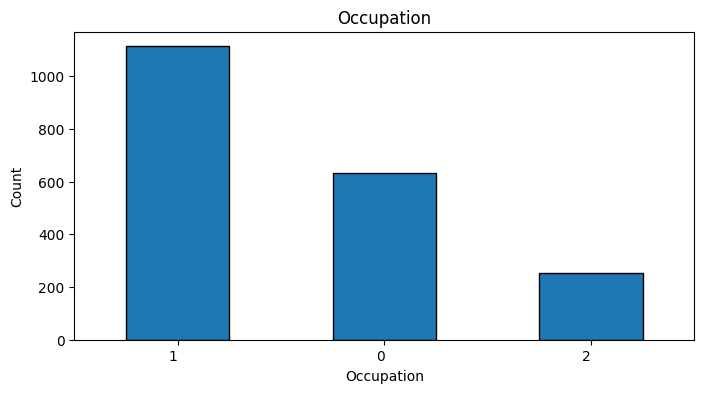

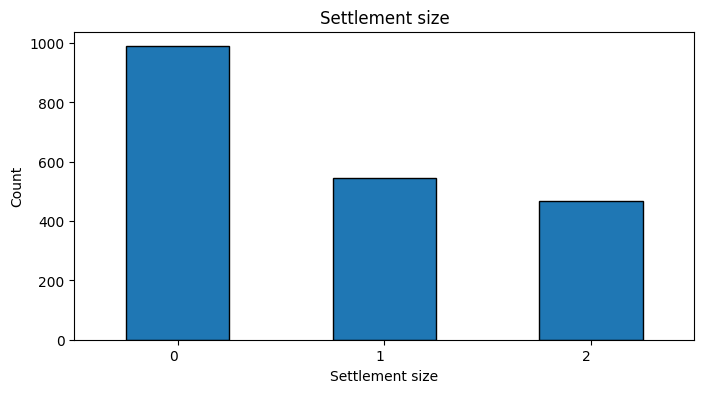

In [57]:
for categorical in categorical_columns:
    plt.figure(figsize=(8, 4))
    df_customer[categorical].value_counts().plot(kind='bar', edgecolor='black')  # Bar plot for categorical variables
    plt.xlabel(categorical)
    plt.ylabel('Count')
    plt.title(categorical)
    plt.xticks(rotation = 0 ,ha="right")
    plt.show()


데이터 세분화를 위해 K-means clustering 기법을 사용한다.

In [58]:
from sklearn.cluster import KMeans

클러스터링에 사용할 feature

In [59]:
features = df_customer[['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation', 'Settlement size']]

ELbow Method를 사용하여 k값 결정

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

<function matplotlib.pyplot.show(close=None, block=None)>

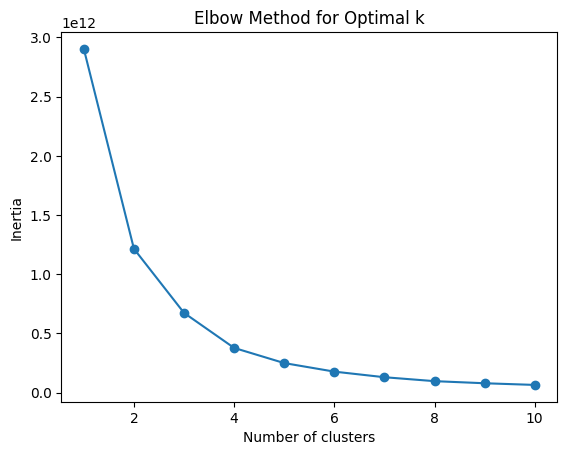

In [60]:
inertia = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters = k, random_state = 42)
  kmeans.fit(features)
  inertia.append(kmeans.inertia_)
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show

k값은 5으로 결정

In [61]:
k = 5
kmeans = KMeans(n_clusters=k)
kmeans.fit(features)
cluster=kmeans.labels_
cluster

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([3, 2, 1, ..., 1, 0, 1], dtype=int32)

Clustering

In [62]:
df_customer['cluster']=cluster
df_customer

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster
0,100000001,0,0,67,2,124670,1,2,3
1,100000002,1,1,22,1,150773,1,2,2
2,100000003,0,0,49,1,89210,0,0,1
3,100000004,0,0,45,1,171565,1,1,2
4,100000005,0,0,53,1,149031,1,1,3
...,...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0,3
1996,100001997,1,1,27,1,117744,1,0,0
1997,100001998,0,0,31,0,86400,0,0,1
1998,100001999,1,1,24,1,97968,0,0,0


각각의 군집에 대해 분석

In [63]:
df_customer[df_customer['cluster']==0]

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster
10,100000011,1,1,25,1,108469,1,0,0
12,100000013,1,1,22,1,108687,1,2,0
14,100000015,1,1,28,1,102899,1,1,0
20,100000021,0,0,48,1,118777,1,1,0
24,100000025,0,1,26,1,103667,1,2,0
...,...,...,...,...,...,...,...,...,...
1989,100001990,1,1,25,1,106567,0,0,0
1992,100001993,1,0,51,1,101074,0,0,0
1994,100001995,0,0,45,1,113414,1,0,0
1996,100001997,1,1,27,1,117744,1,0,0


In [64]:
df_customer[df_customer['cluster']==0].describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster
count,7.190000e+02,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.0
mean,1.000011e+08,0.546592,0.554937,32.293463,0.941586,105833.310153,0.748261,0.623088,0.0
std,5.933250e+02,0.498171,0.497319,9.298147,0.456379,7676.761536,0.480012,0.767422,0.0
min,1.000000e+08,0.000000,0.000000,18.000000,0.000000,90418.000000,0.000000,0.000000,0.0
25%,1.000005e+08,0.000000,0.000000,26.000000,1.000000,99674.500000,0.000000,0.000000,0.0
50%,1.000012e+08,1.000000,1.000000,30.000000,1.000000,106741.000000,1.000000,0.000000,0.0
75%,1.000016e+08,1.000000,1.000000,37.000000,1.000000,112238.500000,1.000000,1.000000,0.0
max,1.000020e+08,1.000000,1.000000,67.000000,2.000000,118820.000000,2.000000,2.000000,0.0


In [65]:
df_customer[df_customer['cluster']==1]

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster
2,100000003,0,0,49,1,89210,0,0,1
13,100000014,0,0,60,2,89374,0,0,1
15,100000016,1,1,32,1,88428,0,0,1
22,100000023,0,0,48,1,89804,0,0,1
25,100000026,0,0,36,1,71909,0,0,1
...,...,...,...,...,...,...,...,...,...
1987,100001988,0,0,25,0,66628,0,0,1
1990,100001991,1,1,31,1,78758,0,0,1
1993,100001994,1,0,38,1,87670,0,0,1
1997,100001998,0,0,31,0,86400,0,0,1


In [66]:
df_customer[df_customer['cluster']==1].describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster
count,3.660000e+02,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.00000,366.0
mean,1.000013e+08,0.540984,0.494536,32.459016,0.885246,74376.442623,0.027322,0.04918,1.0
std,6.157395e+02,0.499000,0.500655,9.812054,0.571421,11672.280604,0.163244,0.28243,0.0
min,1.000000e+08,0.000000,0.000000,20.000000,0.000000,35832.000000,0.000000,0.00000,1.0
25%,1.000007e+08,0.000000,0.000000,25.000000,1.000000,67621.500000,0.000000,0.00000,1.0
50%,1.000015e+08,1.000000,0.000000,29.000000,1.000000,76105.500000,0.000000,0.00000,1.0
75%,1.000018e+08,1.000000,1.000000,38.000000,1.000000,84333.000000,0.000000,0.00000,1.0
max,1.000020e+08,1.000000,1.000000,74.000000,3.000000,90051.000000,1.000000,2.00000,1.0


In [67]:
df_customer[df_customer['cluster']==2]

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster
1,100000002,1,1,22,1,150773,1,2,2
3,100000004,0,0,45,1,171565,1,1,2
6,100000007,0,0,53,1,156495,1,1,2
7,100000008,0,0,35,1,193621,2,1,2
8,100000009,0,1,61,2,151591,0,0,2
...,...,...,...,...,...,...,...,...,...
1281,100001282,0,0,52,1,159216,1,1,2
1285,100001286,0,1,64,2,154549,1,1,2
1296,100001297,0,0,33,1,151339,2,1,2
1297,100001298,0,0,71,2,170387,1,2,2


In [68]:
df_customer[df_customer['cluster']==2].describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster
count,2.800000e+02,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.0
mean,1.000007e+08,0.292857,0.460714,41.967857,1.242857,168190.928571,1.400000,1.310714,2.0
std,3.975192e+02,0.455888,0.499347,13.014565,0.686495,13571.526098,0.559057,0.655738,0.0
min,1.000000e+08,0.000000,0.000000,20.000000,0.000000,150158.000000,0.000000,0.000000,2.0
25%,1.000004e+08,0.000000,0.000000,32.000000,1.000000,157261.750000,1.000000,1.000000,2.0
50%,1.000008e+08,0.000000,0.000000,39.000000,1.000000,165990.500000,1.000000,1.000000,2.0
75%,1.000011e+08,1.000000,1.000000,52.000000,2.000000,176440.250000,2.000000,2.000000,2.0
max,1.000015e+08,1.000000,1.000000,76.000000,3.000000,202997.000000,2.000000,2.000000,2.0


In [69]:
df_customer[df_customer['cluster']==3]

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster
0,100000001,0,0,67,2,124670,1,2,3
4,100000005,0,0,53,1,149031,1,1,3
5,100000006,0,0,35,1,144848,0,0,3
11,100000012,1,1,24,1,127596,1,0,3
16,100000017,0,0,53,1,125550,1,0,3
...,...,...,...,...,...,...,...,...,...
1983,100001984,1,1,28,1,130877,1,0,3
1986,100001987,1,1,21,1,120682,1,0,3
1988,100001989,1,1,35,1,124447,0,0,3
1991,100001992,0,0,54,1,128537,1,0,3


In [70]:
df_customer[df_customer['cluster']==3].describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster
count,5.620000e+02,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.0
mean,1.000009e+08,0.396797,0.455516,38.645907,1.120996,131865.895018,0.975089,0.950178,3.0
std,5.319115e+02,0.489669,0.498461,11.912525,0.639981,8684.533856,0.477014,0.819335,0.0
min,1.000000e+08,0.000000,0.000000,20.000000,0.000000,118879.000000,0.000000,0.000000,3.0
25%,1.000005e+08,0.000000,0.000000,29.250000,1.000000,124536.750000,1.000000,0.000000,3.0
50%,1.000009e+08,0.000000,0.000000,36.000000,1.000000,130333.500000,1.000000,1.000000,3.0
75%,1.000013e+08,1.000000,1.000000,46.000000,1.000000,138725.000000,1.000000,2.000000,3.0
max,1.000020e+08,1.000000,1.000000,74.000000,3.000000,149851.000000,2.000000,2.000000,3.0


In [71]:
df_customer[df_customer['cluster']==4]

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster
18,100000019,1,1,44,2,261952,2,2,4
63,100000064,0,0,25,0,227385,1,2,4
87,100000088,0,0,47,1,241068,1,1,4
95,100000096,0,0,58,2,268340,1,1,4
105,100000106,0,0,39,1,244716,2,2,4
...,...,...,...,...,...,...,...,...,...
1074,100001075,0,1,43,2,280566,2,2,4
1076,100001077,1,1,71,3,211572,2,1,4
1092,100001093,1,1,45,2,260847,2,2,4
1093,100001094,0,0,65,2,285647,2,2,4


In [72]:
df_customer[df_customer['cluster']==4].describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster
count,7.300000e+01,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.0
mean,1.000006e+08,0.246575,0.383562,44.506849,1.328767,238230.369863,1.821918,1.520548,4.0
std,3.529904e+02,0.434000,0.489618,15.288088,0.850732,29637.835953,0.385230,0.603453,0.0
min,1.000000e+08,0.000000,0.000000,21.000000,0.000000,203738.000000,1.000000,0.000000,4.0
25%,1.000003e+08,0.000000,0.000000,30.000000,1.000000,214364.000000,2.000000,1.000000,4.0
50%,1.000006e+08,0.000000,0.000000,43.000000,1.000000,224961.000000,2.000000,2.000000,4.0
75%,1.000010e+08,0.000000,1.000000,57.000000,2.000000,261952.000000,2.000000,2.000000,4.0
max,1.000011e+08,1.000000,1.000000,75.000000,3.000000,309364.000000,2.000000,2.000000,4.0


Cluster 0

*   Age Range: 21 - 68
*   Median Age: 35
*   Income Range: 43684 - 175800
*   Median Income: 95228
*   Sex: 0
*   Marital Status: 0, 1
*   Education: 0, 1, 2
*   Occupation: 0, 1
*   Settlement size: 0, 2

Cluster 1

*   Age Range: 18 - 42
*   Median Age: 29
*   Income Range: 35832 - 143319
*   Median Income: 98360.5
*   Sex: 0, 1
*   Marital Status: 0, 1
*   Education: 0, 1, 2
*   Occupation: 0, 1
*   Settlement size: 0, 1

Cluster 2

*   Age Range: 18 - 42
*   Median Age: 27
*   Income Range: 88475 - 308491
*   Median Income: 116708
*   Sex: 0, 1
*   Marital Status: 0, 1
*   Education: 1, 2
*   Occupation: 0, 1, 2
*   Settlement size: 0, 1, 2

Cluster 3

*   Age Range: 25 - 76
*   Median Age: 57
*   Income Range: 69487 - 309364
*   Median Income: 147431
*   Sex: 0, 1
*   Marital Status: 0, 1
*   Education: 2, 3
*   Occupation: 0, 1, 2
*   Settlement size: 0, 1, 2

Cluster 4

*   Age Range: 20 - 58
*   Median Age: 36
*   Income Range: 88027 - 268906
*   Median Income: 136133.5
*   Sex: 0, 1
*   Marital Status: 0
*   Education: 0, 1
*   Occupation: 0, 1, 2
*   Settlement size: 0, 1, 2


